In [1]:
import os
import sys
import json
import copy

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fh = open('data/ukbb/mafs/gene_set_2.json')
results = json.load(fh)
fh.close()

In [3]:
print(results.keys())
results['compl_stats']

dict_keys(['compl_stats', 'sample_stats'])


{'count': 3562,
 'mean': 0.1731171572398064,
 'median': 0.07740294604833736,
 'lo95': 0.0122188414606672,
 'up95': 0.6250949431621882,
 'lo50': 0.02879865711394428,
 'up50': 0.2895105595370778,
 'min': 0.005652922395552893,
 'max': 0.6665320185339194}

In [10]:
def distplot(plt, x_pos, data, c, log=False):
    
    data = copy.deepcopy(data)
    for k, v in data.items():
        if not k in ('count', 'name'):
            if log:
                data[k] = np.log10(v)
    
    plt.plot([x_pos], [data['mean']], marker='*', color=c)
    plt.plot([x_pos], [data['median']], marker='x', color=c)

    plt.plot([x_pos], [data['up50']], marker='v', color=c, lw=1)
    plt.plot([x_pos], [data['lo50']], marker='^', color=c, lw=1)
    plt.plot([x_pos, x_pos], [data['lo50'], data['up50']], marker=None, color=c, lw=1, linestyle='-')

    plt.plot([x_pos, x_pos], [data['lo95'], data['up95']], marker='_', color=c, lw=1, linestyle='--')

    plt.plot([x_pos, x_pos], [data['min'], data['max']], marker='.', color=c, lw=0)

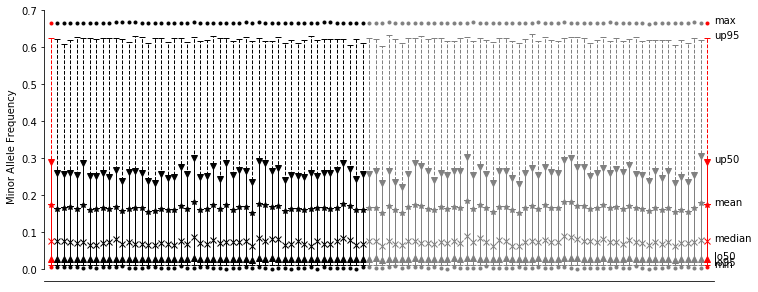

In [5]:
sorted_samples = sorted([(d['Up'], d) for d in results['sample_stats']])
sorted_samples.reverse()

plt.figure(figsize=(12,5))

distplot(plt, -1, results['compl_stats'], 'red')

for i, (Up, data) in enumerate(sorted_samples):
    color = 'black' if Up >= 0.05 else 'grey'
    distplot(plt, i, results['sample_stats'][i], color)

distplot(plt, i+1, results['compl_stats'], 'red')

for k, v in results['compl_stats'].items():
    if k == 'count':
        continue
    #plt.text(i+2, np.log10(v), k)
    plt.text(i+2, v, k)

# plt.ylim(-0.1,1.1)
plt.xlim(-2,i+2)
plt.xticks([])
plt.ylabel('Minor Allele Frequency')
sns.despine(trim=True)
# plt.yscale('log')
plt.savefig('figures/r1/maf_distributiion_comparison_linear.pdf')

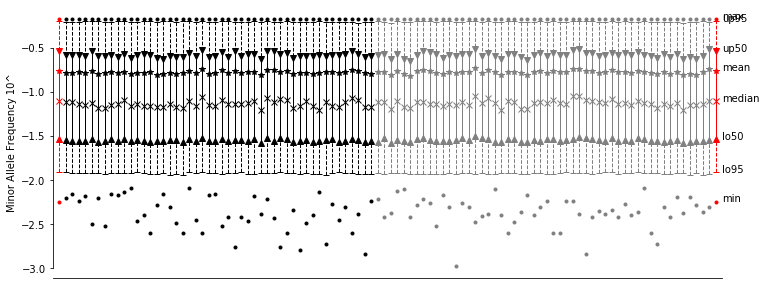

In [11]:
sorted_samples = sorted([(d['Up'], d) for d in results['sample_stats']])
sorted_samples.reverse()

plt.figure(figsize=(12,5))

distplot(plt, -1, results['compl_stats'], 'red', log=True)

for i, (Up, data) in enumerate(sorted_samples):
    color = 'black' if Up >= 0.05 else 'grey'
    distplot(plt, i, results['sample_stats'][i], color, log=True)

distplot(plt, i+1, results['compl_stats'], 'red', log=True)

for k, v in results['compl_stats'].items():
    if k == 'count':
        continue
    plt.text(i+2, np.log10(v), k)

# plt.ylim(-0.1,1.1)
plt.xlim(-2,i+2)
plt.xticks([])
plt.ylabel('Minor Allele Frequency 10^')
sns.despine(trim=True)
# plt.yscale('log')
plt.savefig('figures/r1/maf_distributiion_comparison_log.pdf')